In [1]:
!pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'published_in': 'Electronic imaging', 'year': 1993, 'url': 'https://www.semanticscholar.org/paper/53

In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('data.csv')

# Display the first few rows to understand the structure
print(df.head())

         ID  radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0    842302    17.99     10.38      122.80  1001.0      0.11840       0.27760   
1    842517    20.57     17.77      132.90  1326.0      0.08474       0.07864   
2  84300903    19.69     21.25      130.00  1203.0      0.10960       0.15990   
3  84348301    11.42     20.38       77.58   386.1      0.14250       0.28390   
4  84358402    20.29     14.34      135.10  1297.0      0.10030       0.13280   

   concavity1  concave_points1  symmetry1  ...  texture3  perimeter3   area3  \
0      0.3001          0.14710     0.2419  ...     17.33      184.60  2019.0   
1      0.0869          0.07017     0.1812  ...     23.41      158.80  1956.0   
2      0.1974          0.12790     0.2069  ...     25.53      152.50  1709.0   
3      0.2414          0.10520     0.2597  ...     26.50       98.87   567.7   
4      0.1980          0.10430     0.1809  ...     16.67      152.20  1575.0   

   smoothness3  compactness3  co

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
logistic_regression = LogisticRegression(max_iter=10000, random_state=42)


In [21]:
logistic_regression.fit(X_train, y_train)


C:\Users\saval\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=10000, random_state=42)

In [22]:
y_pred = logistic_regression.predict(X_test)
y_prob = logistic_regression.predict_proba(X_test)


In [23]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.956140350877193


In [24]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           B       0.95      0.99      0.97        71
           M       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



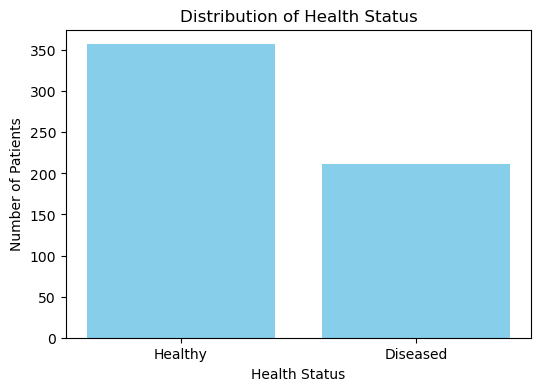

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate class distribution
unique, counts = np.unique(y, return_counts=True)

# Define custom labels
class_labels = ['Healthy', 'Diseased']  # Example custom labels

# Create bar chart
plt.figure(figsize=(6, 4))
plt.bar(unique, counts, color='skyblue')
plt.xlabel('Health Status')  # Custom x-label
plt.ylabel('Number of Patients')  # Custom y-label
plt.title('Distribution of Health Status')
plt.xticks(unique, class_labels)  # Set custom x-axis labels
plt.show()
